In [3]:
import numpy as np

In [2]:
# 모든 PNG 파일에서 중복되지 않는 값
import os
import numpy as np
from PIL import Image  # Import the Image module from PIL

# # Verify Google Drive is mounted
# from google.colab import drive
# drive.mount('/content/drive')

# Specify the folder containing the PNG files
folder_path = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask/"  # Update with your folder path

all_unique_values = set()
png_file_count = 0

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Process only PNG files
        png_file_count += 1
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Load the image and convert it to a NumPy array
        mask = np.array(Image.open(file_path))

        # Process the mask data (e.g., print unique values)
        unique_values = np.unique(mask)
        # Add the unique values to the overall set
        all_unique_values.update(unique_values)
        
        # # print(unique_values) 매번 출력
        # print(f"마스크에 포함된 픽셀 값 ({filename}):", unique_values)

# Print the combined unique values from all PNG files
print("모든 PNG 파일에서 중복되지 않는 값:", all_unique_values, "파일갯수", png_file_count)


KeyboardInterrupt: 

In [14]:
# 한놈만 보기

# mask = np.array(Image.open("/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_224_size224.png"))
mask = np.array(Image.open('/Users/wj/Downloads/BMEN619.03/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_.png'))
# 마스크에 어떤 값들이 있는지 확인
unique_values = np.unique(mask)
print("마스크에 포함된 픽셀 값:", unique_values)

마스크에 포함된 픽셀 값: [1 2 3 4 9]


In [15]:
mask

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 1, 1, ..., 2, 2, 2],
       [2, 1, 1, ..., 2, 2, 2],
       ...,
       [2, 1, 1, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint16)

In [21]:
# 각 고유 값과 개수 계산
unique_values, counts = np.unique(mask, return_counts=True)

# 결과 출력
for val, count in zip(unique_values, counts):
    print(f"값 {val}: {count} 픽셀")

값 0: 35584320 픽셀


In [10]:
import cv2

In [13]:
img = cv2.imread('/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_224_size224.png')

# 이미지 출력
cv2.imshow('image', img)

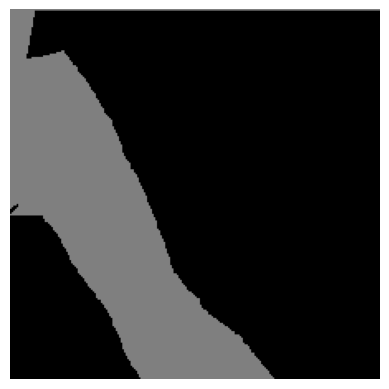

In [15]:
# 마스크값 눈에 보이게 수정
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 (Grayscale로 읽기)
mask = cv2.imread('/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_224_size224.png')
'Downloads/BMEN619.03/archive/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_224_size224_colorchange.png'

# 값 변환 (0 유지, 1 -> 255, 2 -> 127)
mask_transformed = np.where(mask == 1, 255, np.where(mask == 2, 127, 0)).astype(np.uint8)

# 이미지 출력 (Matplotlib 사용)
# plt.imshow(mask)

plt.imshow(mask_transformed
           # , cmap='gray'
          )
plt.axis('off')  # 축 제거
plt.show()

In [20]:
# 마스크값 눈에 보이게 수정 젤 큰 roi 가져와서.. wsi 마스크는 존재하지 않음. 왜 안되지;ㅇ
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 (Grayscale로 읽기)
mask = cv2.imread('/Users/wj/Downloads/BMEN619.03/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_.png')

# 값 변환 (0 유지, 1 -> 255, 2 -> 127)
# 0,64,128,192,255
# Let's make 9, 3, 4, 2, 1
# mask_transformed = np.where(mask == 1, 255, np.where(mask == 2, 127, 0)).astype(np.uint8)
mask_transformed = np.where(mask == 9, 255, np.where(mask == 3, 255, 
                   np.where(mask == 4, 255, 
                   np.where(mask == 2, 127, 
                   np.where(mask == 1, 255,0 ))))).astype(np.uint8)

# mapping = {9: 0, 3: 64, 4: 128, 2: 192, 1: 255}
# mask_transformed = np.vectorize(mapping.get)(mask).astype(np.uint8)
# 이미지 출력 (Matplotlib 사용)
# plt.imshow(mask)

plt.imshow(mask_transformed
           # , cmap='gray'
          )
plt.axis('off')  # 축 제거
plt.show()

ValueError: either both or neither of x and y should be given

In [18]:
mask_transformed

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
type(mask_transformed)

numpy.ndarray

In [17]:
cv2.imwrite('TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_224_size224_colorchange.png', mask_transformed)

True

In [26]:
# wsi 개수세기
# 파일이 저장된 폴더 경로 설정
folder_path = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask"

# 파일 목록 가져오기
file_list = [f for f in os.listdir(folder_path) if f.endswith(".png")]
print(file_list[0])
# DX1 기준 앞부분 추출
unique_prefixes = set(f.split("-DX1")[0] for f in file_list)
# print(unique_prefixes)

# for f in file_list:
#     print(f.split("-DX1")[0])

# 결과 출력
print(f"유니크한 값 개수: {len(unique_prefixes)}")


TCGA-A2-A0ST-DX1_xmin109446_ymin18274_MPP-0_4032_2240_size224.png
유니크한 값 개수: 151


In [28]:
# wsi 개수세기 val
# 파일이 저장된 폴더 경로 설정
folder_path = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/val_mask"

# 파일 목록 가져오기
file_list = [f for f in os.listdir(folder_path) if f.endswith(".png")]
print(file_list[0])
# DX1 기준 앞부분 추출
unique_prefixes_val = set(f.split("-DX1")[0] for f in file_list)
# print(unique_prefixes)

# for f in file_list:
#     print(f.split("-DX1")[0])

# 결과 출력
print(f"유니크한 값 개수: {len(unique_prefixes_val)}")


TCGA-EW-A1P8-DX1_xmin15520_ymin26381_MPP-0_2688_1792_size224.png
유니크한 값 개수: 151


In [30]:
# import os
from collections import defaultdict

# 파일이 저장된 폴더 경로
folder_path = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/val_mask"

# 파일 목록 가져오기 (PNG 파일만)
file_list = [f for f in os.listdir(folder_path) if f.endswith(".png")]

# 각 고유한 파일 앞부분(DX1 기준 앞부분)별 파일 개수 저장
file_counts = defaultdict(int)

for filename in file_list:
    if "-DX1" in filename:  # "_DX1"이 포함된 파일만 처리
        prefix = filename.split("-DX1")[0]  # "_DX1" 앞부분만 추출
        file_counts[prefix] += 1  # 해당 prefix에 대한 파일 개수 증가

# 결과 출력
for prefix, count in file_counts.items():
    print(f"{prefix}: {count}개 파일 존재")

# 유니크한 앞부분 개수 출력
print(f"\n총 유니크한 파일 그룹 개수: {len(file_counts)}")


TCGA-EW-A1P8: 31개 파일 존재
TCGA-AO-A0J6: 50개 파일 존재
TCGA-BH-A18V: 55개 파일 존재
TCGA-E2-A573: 19개 파일 존재
TCGA-BH-A0WA: 82개 파일 존재
TCGA-GM-A3XL: 45개 파일 존재
TCGA-A7-A26F: 50개 파일 존재
TCGA-AR-A0TS: 28개 파일 존재
TCGA-S3-AA15: 8개 파일 존재
TCGA-EW-A1OW: 104개 파일 존재
TCGA-AO-A03U: 72개 파일 존재
TCGA-D8-A1JG: 68개 파일 존재
TCGA-D8-A1XQ: 46개 파일 존재
TCGA-A8-A07C: 25개 파일 존재
TCGA-D8-A13Z: 68개 파일 존재
TCGA-E2-A1AZ: 21개 파일 존재
TCGA-AR-A0TU: 14개 파일 존재
TCGA-C8-A131: 15개 파일 존재
TCGA-EW-A1PB: 34개 파일 존재
TCGA-D8-A27F: 39개 파일 존재
TCGA-E2-A14N: 63개 파일 존재
TCGA-A2-A0D2: 12개 파일 존재
TCGA-D8-A142: 128개 파일 존재
TCGA-E2-A150: 34개 파일 존재
TCGA-E2-A1B6: 51개 파일 존재
TCGA-BH-A1EW: 40개 파일 존재
TCGA-BH-A1FC: 53개 파일 존재
TCGA-A2-A04P: 34개 파일 존재
TCGA-D8-A27H: 17개 파일 존재
TCGA-A2-A0YM: 86개 파일 존재
TCGA-AC-A7VC: 41개 파일 존재
TCGA-EW-A6SB: 55개 파일 존재
TCGA-AR-A2LR: 9개 파일 존재
TCGA-A7-A6VW: 18개 파일 존재
TCGA-AN-A0XU: 73개 파일 존재
TCGA-BH-A0E6: 67개 파일 존재
TCGA-A7-A0CE: 66개 파일 존재
TCGA-AR-A2LH: 31개 파일 존재
TCGA-GM-A2DB: 99개 파일 존재
TCGA-AN-A0AL: 29개 파일 존재
TCGA-A2-A0CM: 43개 파일 존재
TCGA-BH-A18G: 15

In [31]:
# import os
from collections import defaultdict

# 파일이 저장된 폴더 경로
folder_path = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask"

# 파일 목록 가져오기 (PNG 파일만)
file_list = [f for f in os.listdir(folder_path) if f.endswith(".png")]

# 각 고유한 파일 앞부분(DX1 기준 앞부분)별 파일 개수 저장
file_counts = defaultdict(int)

for filename in file_list:
    if "-DX1" in filename:  # "_DX1"이 포함된 파일만 처리
        prefix = filename.split("-DX1")[0]  # "_DX1" 앞부분만 추출
        file_counts[prefix] += 1  # 해당 prefix에 대한 파일 개수 증가

# 결과 출력
for prefix, count in file_counts.items():
    print(f"{prefix}: {count}개 파일 존재")

# 유니크한 앞부분 개수 출력
print(f"\n총 유니크한 파일 그룹 개수: {len(file_counts)}")


TCGA-A2-A0ST: 336개 파일 존재
TCGA-AN-A0XU: 368개 파일 존재
TCGA-AN-A0AL: 191개 파일 존재
TCGA-A2-A04P: 141개 파일 존재
TCGA-D8-A1XQ: 252개 파일 존재
TCGA-E2-A14N: 315개 파일 존재
TCGA-C8-A26Y: 187개 파일 존재
TCGA-D8-A142: 768개 파일 존재
TCGA-AO-A03U: 370개 파일 존재
TCGA-AO-A1KR: 267개 파일 존재
TCGA-E2-A1LK: 320개 파일 존재
TCGA-BH-A0BW: 218개 파일 존재
TCGA-D8-A1JG: 338개 파일 존재
TCGA-GM-A2DF: 197개 파일 존재
TCGA-BH-A0E6: 354개 파일 존재
TCGA-A2-A0CM: 172개 파일 존재
TCGA-BH-A0WA: 543개 파일 존재
TCGA-E2-A1LI: 400개 파일 존재
TCGA-A2-A1G6: 89개 파일 존재
TCGA-GM-A3XL: 250개 파일 존재
TCGA-AC-A2BK: 117개 파일 존재
TCGA-E2-A14X: 270개 파일 존재
TCGA-E2-A159: 343개 파일 존재
TCGA-OL-A5D7: 340개 파일 존재
TCGA-A7-A5ZV: 140개 파일 존재
TCGA-AN-A0AR: 190개 파일 존재
TCGA-A2-A0D0: 653개 파일 존재
TCGA-GI-A2C9: 81개 파일 존재
TCGA-E2-A14R: 67개 파일 존재
TCGA-D8-A1JF: 192개 파일 존재
TCGA-AO-A129: 300개 파일 존재
TCGA-GM-A2DD: 359개 파일 존재
TCGA-AN-A0AT: 139개 파일 존재
TCGA-D8-A143: 404개 파일 존재
TCGA-C8-A26X: 295개 파일 존재
TCGA-E2-A150: 185개 파일 존재
TCGA-EW-A1OV: 522개 파일 존재
TCGA-BH-A0E0: 231개 파일 존재
TCGA-AO-A0J4: 277개 파일 존재
TCGA-EW-A1PH: 307개 파일 존재
TCG

In [32]:
# 조합별로 파일갯수세기
# import os
# import numpy as np
# from PIL import Image

# 마스크 파일들이 저장된 폴더 경로
mask_folder = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask/"

# 유니크 값 조합별로 파일 개수를 세는 딕셔너리
mask_count = {}

# 폴더 내 모든 파일에 대해 반복
for filename in os.listdir(mask_folder):
    if filename.endswith(".png"):  # 이미지 파일만 처리
        # 이미지 열기
        mask = np.array(Image.open(os.path.join(mask_folder, filename)))
        
        # 유니크 값 추출
        unique_values = tuple(np.unique(mask))  # 유니크 값 튜플로 변환
        
        # 해당 조합의 파일 수 카운트
        if unique_values in mask_count:
            mask_count[unique_values] += 1
        else:
            mask_count[unique_values] = 1

# 결과 출력
for unique_values, count in mask_count.items():
    print(f"Unique values {unique_values}: {count} files")


Unique values (np.uint8(0), np.uint8(1), np.uint8(2)): 6082 files
Unique values (np.uint8(0), np.uint8(1)): 2938 files
Unique values (np.uint8(1), np.uint8(2)): 6172 files
Unique values (np.uint8(0), np.uint8(2)): 6556 files
Unique values (np.uint8(0),): 2994 files
Unique values (np.uint8(1),): 4089 files
Unique values (np.uint8(2),): 1929 files


In [27]:
# 이미지 로드 시 에러가 나는 파일 찾기
mask_folder = "/Users/wj/Downloads/BMEN619.03/archive/BCSS/train_mask/"

for filename in os.listdir(mask_folder):
    if filename.endswith(".png"):  # 이미지 파일만 처리
        try:
            img = Image.open((os.path.join(mask_folder, filename)))  # 정상적으로 열리는지 확인
        except Exception as e:
            print(f"손상된 이미지: {filename}")


In [ ]:
(os.path.join(mask_folder, filename)